<a href="https://colab.research.google.com/github/Maziar-Mehr/Class-Labs-/blob/main/Computer_Vision_Photo_Rec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [3]:
from tensorflow import keras

In [6]:
tf.__version__

'2.7.0'

In [7]:
import warnings 
warnings.filterwarnings("ignore")

In [8]:
import numpy as np 
import pandas as pd

In [9]:
# laod dataset-7000 images greyscale 28x28px, 10 classes
fashion = keras.datasets.fashion_mnist

In [10]:
(x_train_full, y_train_full), (X_test, y_test) = fashion.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [11]:
x_train_full.shape

(60000, 28, 28)

In [12]:
X_test.shape

(10000, 28, 28)

In [13]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [14]:
from matplotlib import pyplot

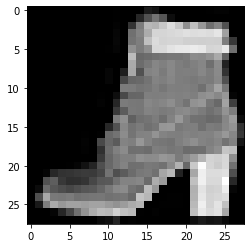

In [17]:
pyplot.imshow(X_test[2314], cmap=pyplot.get_cmap("gray"))

In [20]:
# creating validation dataset 
# divide imgaes by 255.0 to escale each pixel as less than 1 
X_valid, X_train=x_train_full[:5000], x_train_full[5000:]/255.0 

In [22]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
# labels dont need to be devided 

In [24]:
X_valid.shape

(5000, 28, 28)

In [26]:
y_valid.shape

(5000,)

In [27]:
# define the classes as if 1 then 'tshirt"
class_names = ["Tshirt/Top", "Trousers", "Pullover/jumper", "Dress", "Coat", "Sandal", "Shirt", "Sneakers", "Bag", "Ankle Boots"]

In [28]:
class_names[y_test[2314]]

'Ankle Boots'

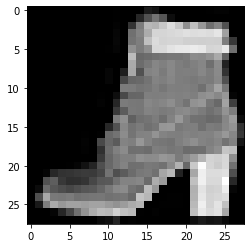

In [31]:
pyplot.imshow(X_test[2314], cmap=pyplot.get_cmap("gray"))

In [32]:
# neural notwork, using the sequential API(keras)
# a single stack of linear layers which intreapts 
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax")) # allows us to classify 1-10
# if using dense layers can overfit 

In [35]:
# compile rather than fit 
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])

In [37]:
history = model.fit(X_train, y_train, epochs=25, validation_data=(X_valid, y_valid))

Epoch 1/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7174 - accuracy: 0.7654 - val_loss: 72.9007 - val_accuracy: 0.7946
Epoch 2/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4863 - accuracy: 0.8294 - val_loss: 65.6492 - val_accuracy: 0.8228
Epoch 3/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4425 - accuracy: 0.8444 - val_loss: 81.1675 - val_accuracy: 0.8156
Epoch 4/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4161 - accuracy: 0.8535 - val_loss: 60.9519 - val_accuracy: 0.8428
Epoch 5/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3967 - accuracy: 0.8603 - val_loss: 63.1646 - val_accuracy: 0.8386
Epoch 6/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3795 - accuracy: 0.8670 - val_loss: 61.9917 - val_accuracy: 0.8414
Epoch 7/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3660 - accuracy: 0.8708 - val_loss: 61.4416 - val_ac

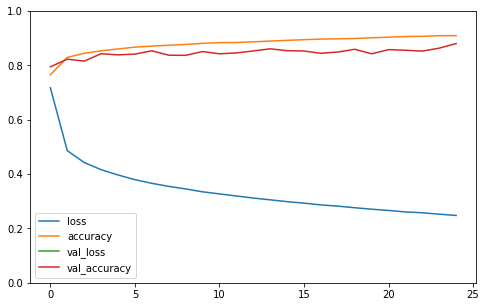

In [41]:
pd.DataFrame(history.history).plot(figsize= (8,5))
pyplot.grid = True 
pyplot.gca().set_ylim(0,1)
pyplot.show()

In [42]:
# use model to predict the class of our testing data set 
X_test.shape


(10000, 28, 28)

In [43]:
X_test_sample=X_test[100:120]
y_prob= model.predict(X_test_sample)
y_prob.round(5)

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [47]:
y_pred = model.predict(X_test_sample)
classes_x=np.argmax(y_pred,axis=1)
classes_x


array([3, 6, 7, 6, 7, 8, 5, 9, 9, 4, 2, 5, 7, 0, 5, 2, 8, 6, 7, 8])

In [50]:
actual= y_test[100:120]

In [51]:
actual


array([3, 6, 7, 2, 7, 8, 5, 9, 9, 4, 2, 5, 7, 0, 5, 2, 8, 6, 7, 8],
      dtype=uint8)

In [52]:
np.array(class_names)[classes_x]

array(['Dress', 'Shirt', 'Sneakers', 'Shirt', 'Sneakers', 'Bag', 'Sandal',
       'Ankle Boots', 'Ankle Boots', 'Coat', 'Pullover/jumper', 'Sandal',
       'Sneakers', 'Tshirt/Top', 'Sandal', 'Pullover/jumper', 'Bag',
       'Shirt', 'Sneakers', 'Bag'], dtype='<U15')

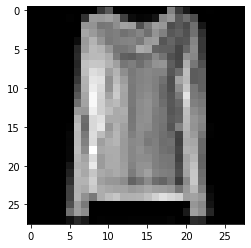

In [54]:
pyplot.imshow(X_test[103], cmap=pyplot.get_cmap("gray"))

In [58]:
# compare the arrays for all predictions for x test againts all real y_test
predicted_all= model.predict(X_test)
predicted_class= np.argmax(predicted_all, axis=1)
actual_all= y_test

In [59]:
matches = (predicted_class==actual_all)
matches.sum()/float(len(matches))

0.8704